In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import os

- Who are the professionals of IT based on survey? (when we said about professional they have to work with a lot of techs as ..)
    - Who are the professionals?
    - What kind of technologies increase in the last 3 years (in the last 3 years about database was...)
    - Mental Health (read article about mental health to discuss)


In [195]:
pd.set_option('display.max_columns', 500)

In [196]:
pd.set_option('display.max_rows', 500)

In [197]:
data_2020 = pd.read_csv(f'data/public/survey_results_public_2020.csv')
data_2021 = pd.read_csv(f'data/public/survey_results_public_2021.csv')
data_2022 = pd.read_csv(f'data/public/survey_results_public_2022.csv')

for mental health exists features interstings as job satisfaction JobSat, JobSeek (if is seeking a job), JobFactors whats is the factor to have a job. WelcomeChange

In [198]:
data_selected_2020 = data_2020[[
    'Respondent', 'MainBranch', 'Age', 'Age1stCode', 'Country', 'DevType', 'EdLevel', 'Ethnicity', 'OpSys', 'OrgSize',
    'Gender', 'Sexuality', 'YearsCode', 'YearsCodePro', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'WelcomeChange', 'NEWJobHunt',
    'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'PlatformDesireNextYear', 
    'PlatformWorkedWith']].copy()

In [199]:
data_selected_2021 = data_2021[[
    'ResponseId', 'MainBranch', 'Age', 'Age1stCode', 'Country', 'DevType', 'EdLevel', 'Ethnicity', 'OpSys', 'OrgSize',
    'Gender', 'Sexuality', 'YearsCode', 'YearsCodePro', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
    'DatabaseWantToWorkWith', 'DatabaseHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageHaveWorkedWith', 'PlatformWantToWorkWith', 
    'PlatformHaveWorkedWith', 'MentalHealth']].copy()

In [200]:
data_selected_2022 = data_2022[[
    'ResponseId', 'MainBranch', 'Age', 'Country', 'DevType', 'EdLevel', 'Ethnicity', 'OpSysProfessional use', 'OrgSize',
    'Gender', 'Sexuality', 'YearsCode', 'YearsCodePro', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
    'DatabaseWantToWorkWith', 'DatabaseHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageHaveWorkedWith', 'PlatformWantToWorkWith', 
    'PlatformHaveWorkedWith', 'MentalHealth', 'RemoteWork']].copy()

In [201]:
rename_2020 = {
    'Respondent': 'ResponseId',
    'DatabaseDesireNextYear': 'DatabaseWantToWorkWith',
    'DatabaseWorkedWith': 'DatabaseHaveWorkedWith',
    'LanguageDesireNextYear': 'LanguageWantToWorkWith',
    'LanguageWorkedWith': 'LanguageHaveWorkedWith',
    'PlatformDesireNextYear': 'PlatformWantToWorkWith',
    'PlatformWorkedWith': 'PlatformHaveWorkedWith'
}

In [202]:
data_selected_2020.rename(columns=rename_2020, inplace=True)

In [203]:
data_selected_2020['year'] = 2020
data_selected_2021['year'] = 2021
data_selected_2022['year'] = 2022

In [204]:
df = pd.concat([data_selected_2020, data_selected_2021, data_selected_2022], axis=0, ignore_index=True)

In [205]:
df[df['ResponseId'] == 1]

,ResponseId,MainBranch,Age,Age1stCode,Country,DevType,EdLevel,Ethnicity,OpSys,OrgSize,Gender,Sexuality,YearsCode,YearsCodePro,WorkWeekHrs,JobSat,JobFactors,WelcomeChange,NEWJobHunt,DatabaseWantToWorkWith,DatabaseHaveWorkedWith,LanguageWantToWorkWith,LanguageHaveWorkedWith,PlatformWantToWorkWith,PlatformHaveWorkedWith,year,WebframeHaveWorkedWith,WebframeWantToWorkWith,MentalHealth,OpSysProfessional use,RemoteWork
0,1,I am a developer by profession,NaN,13,Germany,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",White or of European descent,Windows,2 to 9 employees,Man,Straight / Heterosexual,36,27,50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Just as welcome now as I felt last year,NaN,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,2020,NaN,NaN,NaN,NaN,NaN
64461,1,I am a developer by profession,25-34 years old,18 - 24 years,Slovakia,"Developer, mobile","Secondary school (e.g. American high school, G...",White or of European descent,MacOS,20 to 99 employees,Man,Straight / Heterosexual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SQLite,PostgreSQL;SQLite,Swift,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,NaN,NaN,2021,Laravel;Symfony,NaN,None of the above,NaN,NaN
147900,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,NaN,NaN,NaN


In [206]:
df.year.value_counts()

2021    83439
2022    73268
2020    64461
Name: year, dtype: int64

In [207]:
df.shape

(221168, 31)

In [209]:
df['MainBranch'] = df['MainBranch'].apply(lambda x: 'I am a student who is learning to code' if x == 'I am learning to code' else x)

In [226]:
df['Country'] = df['Country'].apply(lambda x: 'United States of America' if x == 'United States' else x)

In [219]:
def processing_age(age):
    if type(age) == float or type(age) == int:
        if age > 17 and age < 25:
            return '18-24 years old'
        elif age > 24 and age < 35:
            return '25-34 years old'
        elif age > 34 and age < 45:
            return '35-44 years old'
        elif age > 44 and age < 55:
            return '45-54 years old'
        elif age > 54 and age < 65:
            return '55-64 years old'
        elif age > 64:
            return '65 years or older'
        elif age < 18:
            return 'Under 18 years old'
    return age

In [211]:
df['Age'] = df.Age.apply(processing_age)

In [220]:
df['Age1stCode'] = df['Age1stCode'].apply(processing_age)

## Who are the professionals

In [224]:
def create_bar_plot(feature, df=df, by_year=False):
    fig, ax = plt.subplots(figsize=(10, 7))
    plt.xticks(rotation=90)
    if by_year:
        ax = sns.barplot(x = feature, y = 'ResponseId', hue = 'year', data = df,
                    palette = 'hls',
                    capsize = 0.05,             
                    saturation = 8,             
                    errcolor = 'gray', errwidth = 2,  
                    ci = 'sd')
        ax.set(title=f'{feature} by year')
    else:
        vc = df[feature].value_counts().nlargest(50)
        ax = sns.barplot(x = vc.index, y = vc, palette = 'hls', data = df, ax=ax)
        ax.set(title=f'{feature} General')
    
    return plt.show()

### MainBranch

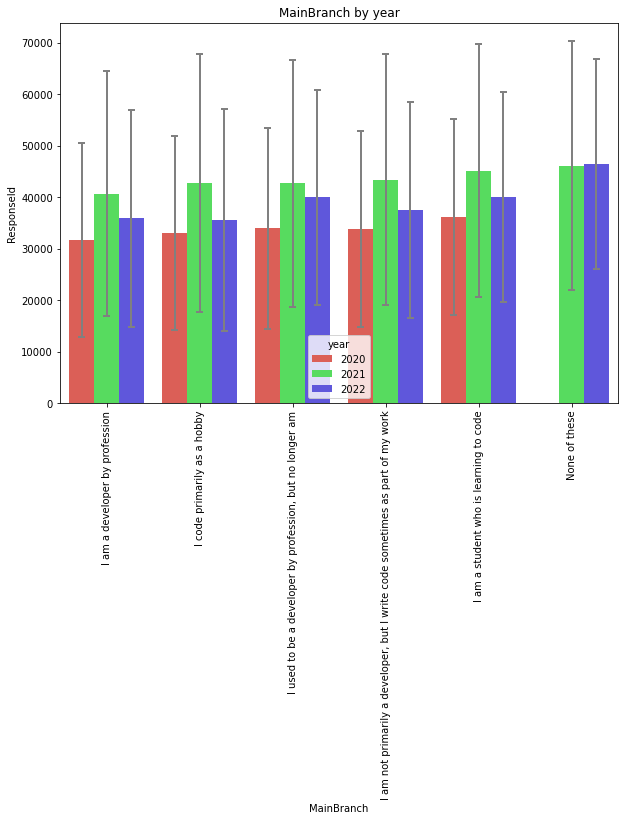

In [213]:
create_bar_plot('MainBranch', by_year=True)

It is intersting the pattern of data between this three years. The number of developers, students, people who sometimes code as part of work and hobbies envolving code increased in the last 2 years. this comparison shows the interest of professionals to work with technology. On the other hand people who used to be a developer by profession followed the increase of data like the others branches.

An observation of increase of data is the quantity of answers that increased too.

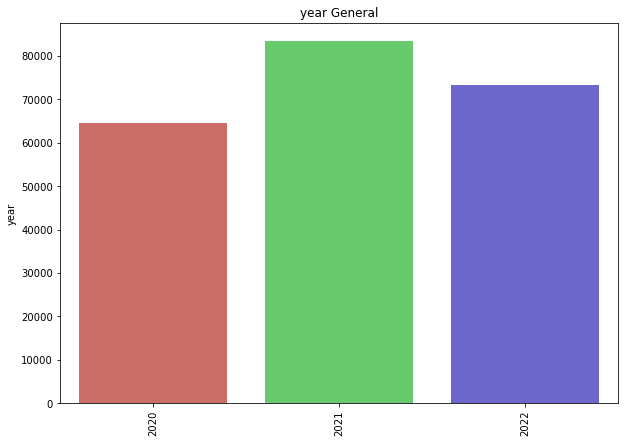

In [214]:
create_bar_plot('year')

### Age

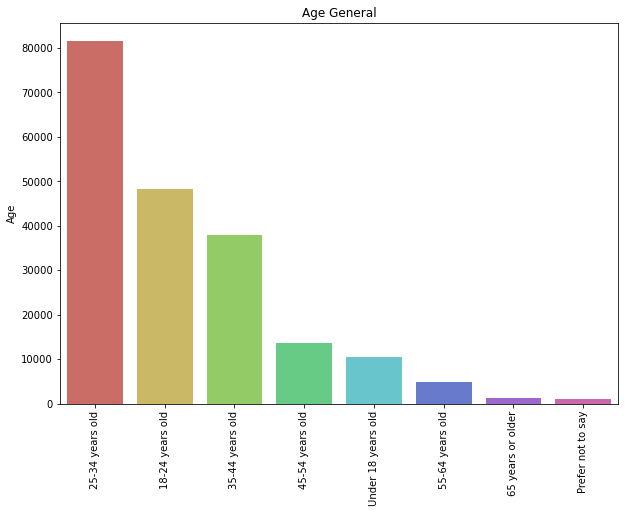

In [216]:
create_bar_plot('Age')

This bars are related to age, the last 3 years shows more respondents in the range between 25 and 35 years old. A nice information to look is related to age, if you are more or less older than 18 years old, no problem, there are people in developer area with diffent kind of ages. I have friends who started in area with more than 30 years. The market of technology needs younger and older people to help in a variety of scenarios. 
The yourgers to learn and start a new area, and olders with a maturity teaching another things related to soft skills and learning hard skills. 
In developer area is important soft skills, because there are a lot of meetings, presentations and problems to solve. Someone new in code segment and old in carreer, sometimes can help with ideas and experience of other jobs.

### Country

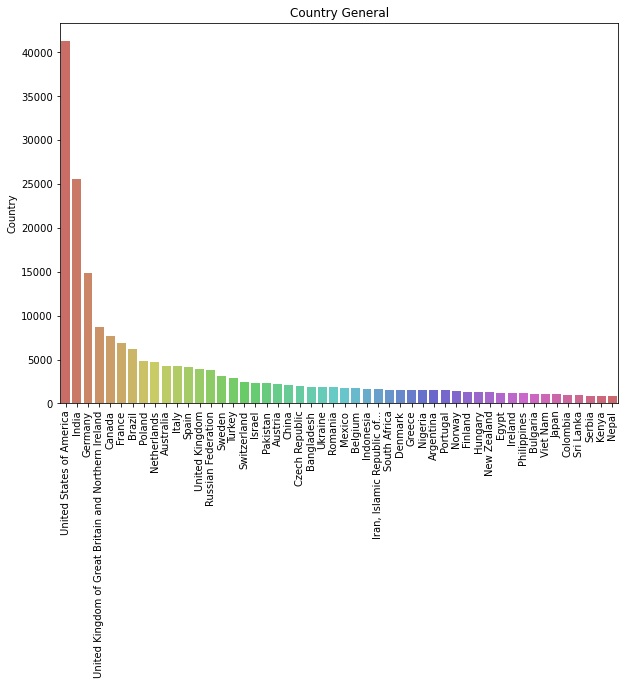

In [229]:
create_bar_plot('Country')

Two countries with more answers are United States and India. I usually access stack overflow, and it is real I saw a lot of Americans and Indians helping others. There are more countries, here I'm showing just the 50 first. The data was collected by a website of stackoverflow, but I have no idea about how was created the campaigns to participate of the search, depends of this whys the quantity of Americans can be a bias.

### EdLevel

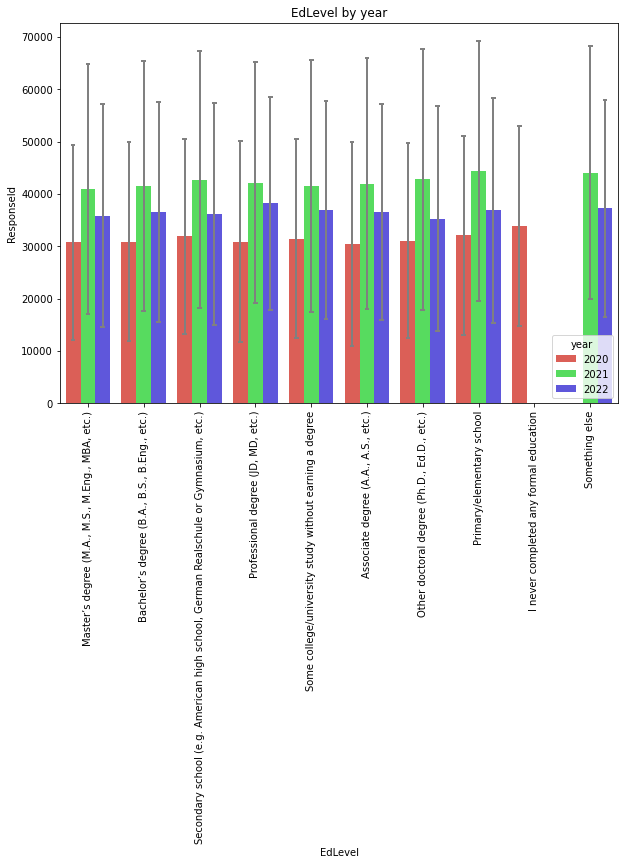

In [231]:
create_bar_plot('EdLevel', by_year=True)

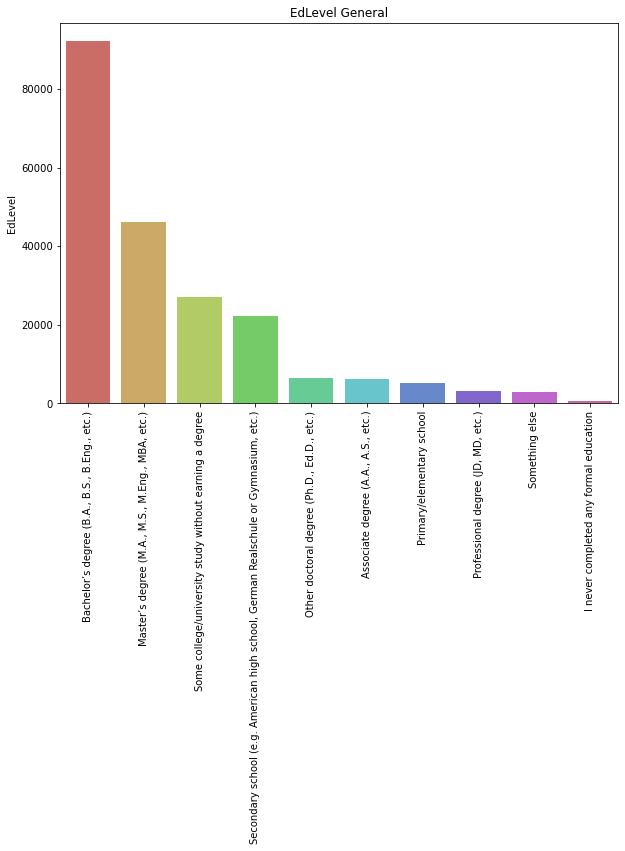

In [232]:
create_bar_plot('EdLevel')

To answer our question related who are the professionals of IT based on stackoverflow data, we have the educational levels, the first plot is by year and the second the general quantity or the 3 last years.

... 

## DevType

In [ ]:
create_bar_plot('DevType', by_year=True)

In [ ]:
create_bar_plot('DevType')